# Dimensionality reduction

description missing ...

In [1]:
import numpy as np
import time
import os, sys
import random

In [2]:
sys.path.append('../../')
from src import myTools, plotTools

## System loading

In [5]:
sysdir_path = '../1.dscr_analysis/' #soap_rcut4_n8_l4/'
sysname = 'soap_rcut6_n_Z1_Z15_Nframe1000every5.npy'

In [6]:
X = np.concatenate(np.load(sysdir_path+sysname))
X.shape

(22800, 5881)

In [7]:
prod_dir = './dimred_data/'

## Dim Red Methods

In [8]:
from sklearn.decomposition import PCA, KernelPCA
from umap import UMAP

### Dimensionality reduction

In [9]:
def get_dimreduction(data, method, method_dict):
    
    # avaliable methods
    DIMRED_METHODS = dict(
    lpca = PCA,
    kpca = KernelPCA,
    umap = UMAP
    )
    
    if method in DIMRED_METHODS.keys():
        dimred_model = DIMRED_METHODS[method](**method_dict)
    else:
        dimred_model = method(**method_dict)
    
    print(f"Data shape: {np.shape(X)}")
    print(f"Method selected: {dimred_model}")
    
    return dimred_model.fit(data)

In [17]:
# inputs

method = 'umap'
lpca_dict = dict(
    n_components = 9
)
umap_dict = dict()

In [18]:
dimred_fit = get_dimreduction(data=X, 
                              method=method, 
                              method_dict=umap_dict)

Data shape: (22800, 5881)
Method selected: UMAP()


In [19]:
dimred_data = dimred_fit.transform(X)

### Plots

In [ ]:
# just something you want to add to the plot name
sysInfoName = 'rcut6'

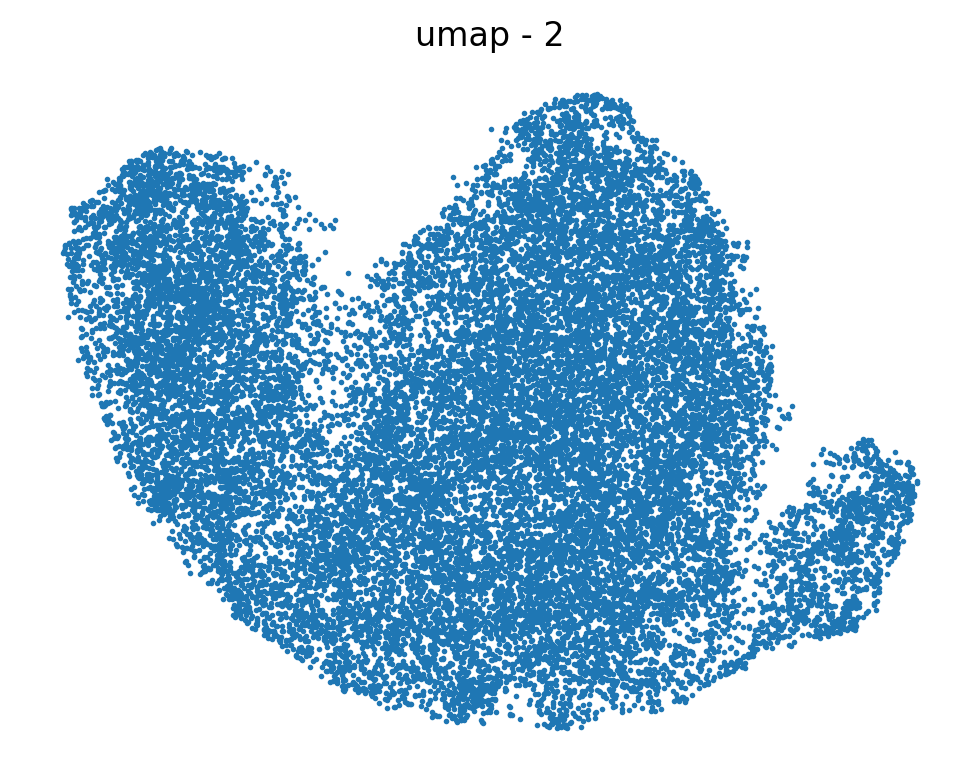

In [20]:
fig, ax = plotTools.get_axes(1)

if dimred_data.shape[1] > 2:
    ax.scatter(dimred_data[:,0], dimred_data[:,1],
                  c=dimred_data[:,2], s=10)
elif dimred_data.shape[1] == 2:
    ax.scatter(*dimred_data.T, s=1)

ax.set_title(f'{method} - {dimred_data.shape[1]}')
plotTools.remove_frame(ax)

fig.tight_layout()
fig.savefig(f"{prod_dir}{method}{dimred_data.shape[1]}_reduction_rcut6", 
            transparent=True)

In [21]:
if method == 'lpca':
    fig, ax = plotTools.get_axes(1)
    n_ = dimred_data.shape[1]
    ax.plot(np.arange(1,n_+1),np.cumsum(dimred_fit.explained_variance_ratio_))
    ax.set_xlabel('number of components')
    ax.set_ylabel('cumulative explained variance')
    fig.tight_layout()
    fig.savefig(f"{prod_dir}{method}{dimred_data.shape[1]}_reduction_variance_rcut6", 
                transparent=True)

### Save data

In [22]:
save_name = sysname.replace('soap_', method+'_')
save_name

'umap_rcut6_n_Z1_Z15_Nframe1000every5.npy'

In [23]:
np.save(prod_dir+save_name, dimred_data)

In [15]:
# !ls ./dimred_data/